<a href="https://colab.research.google.com/github/BinduParvati7/Capstone5588/blob/Bindu's-work/DSCapstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Basic libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/DS_Capstone/fraudTrain.csv", index_col=0)
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/DS_Capstone/fraudTest.csv", index_col=0)
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
train.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.38,-75.20,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.65,-76.15,0
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.99,-100.99,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.16,-100.15,0
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.84,-78.60,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.95,-78.54,0
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.34,-79.66,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.35,-79.96,0
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.52,-87.35,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.18,-87.49,0


In [ ]:
test.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.97,-80.94,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.99,-81.20,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.32,-110.44,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.45,-109.96,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.67,-73.54,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.50,-74.20,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.57,-80.82,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.81,-80.88,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.25,-85.02,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.96,-85.88,0


In [ ]:
train.shape


(1296675, 22)

In [ ]:
test.shape


(555719, 22)

In [ ]:
train.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
test.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,"1,296,675.00","417,192,042,079,726,656.00","1,308,806,447,000,240,384.00","60,416,207,185.00","180,042,946,491,150.00","3,521,417,320,836,166.00","4,642,255,475,285,942.00","4,992,346,398,065,154,048.00"
amt,"1,296,675.00",70.35,160.32,1.00,9.65,47.52,83.14,"28,948.90"
zip,"1,296,675.00","48,800.67","26,893.22","1,257.00","26,237.00","48,174.00","72,042.00","99,783.00"
lat,"1,296,675.00",38.54,5.08,20.03,34.62,39.35,41.94,66.69
long,"1,296,675.00",-90.23,13.76,-165.67,-96.80,-87.48,-80.16,-67.95
city_pop,"1,296,675.00","88,824.44","301,956.36",23.00,743.00,"2,456.00","20,328.00","2,906,700.00"
unix_time,"1,296,675.00","1,349,243,636.73","12,841,278.42","1,325,376,018.00","1,338,750,742.50","1,349,249,747.00","1,359,385,375.50","1,371,816,817.00"
merch_lat,"1,296,675.00",38.54,5.11,19.03,34.73,39.37,41.96,67.51
merch_long,"1,296,675.00",-90.23,13.77,-166.67,-96.90,-87.44,-80.24,-66.95
is_fraud,"1,296,675.00",0.01,0.08,0.00,0.00,0.00,0.00,1.00


In [ ]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((train.isnull().sum()/len(train.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
trans_date_trans_time,0.00
cc_num,0.00
merch_long,0.00
merch_lat,0.00
unix_time,0.00
trans_num,0.00
dob,0.00
job,0.00
city_pop,0.00
long,0.00


In [ ]:
import pandas as pd

# Assuming train and test are your two dataframes
# Concatenate them along rows
dataset = pd.concat([train, test], axis=0, ignore_index=True)

# The 'ignore_index=True' parameter resets the index of the resulting DataFrame
# If you want to keep the original indices, you can omit this parameter.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

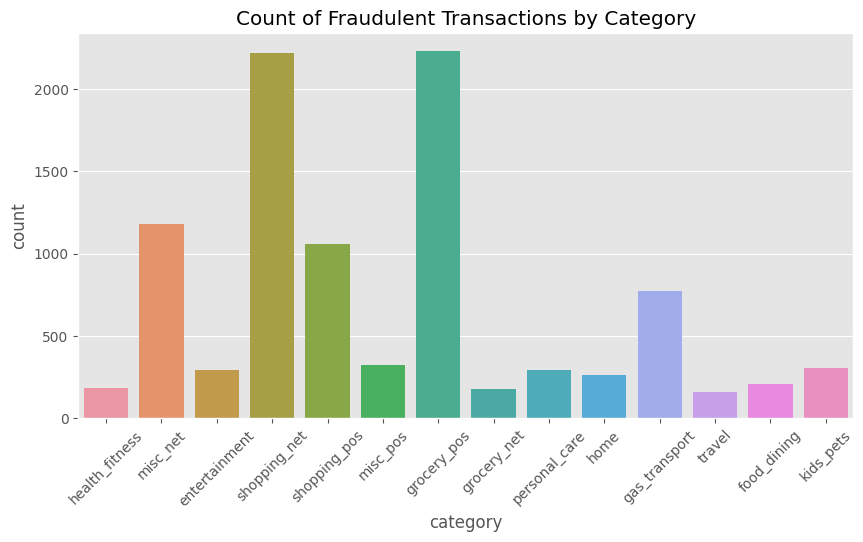

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

total = pd.concat([test, train])
total.info()
total["is_fraud_cat"] = total.is_fraud.apply(lambda x: "T" if x == 1 else "F")
total["is_fraud_cat"] = total["is_fraud_cat"].astype("object")
totalcat = total.select_dtypes(include=['object'])

plt.figure(figsize=(10, 5))
sns.countplot(x=total[total['is_fraud_cat'] == "T"].category)
plt.xticks(rotation=45)

# Add a title to the plot
plt.title("Count of Fraudulent Transactions by Category")

plt.show()


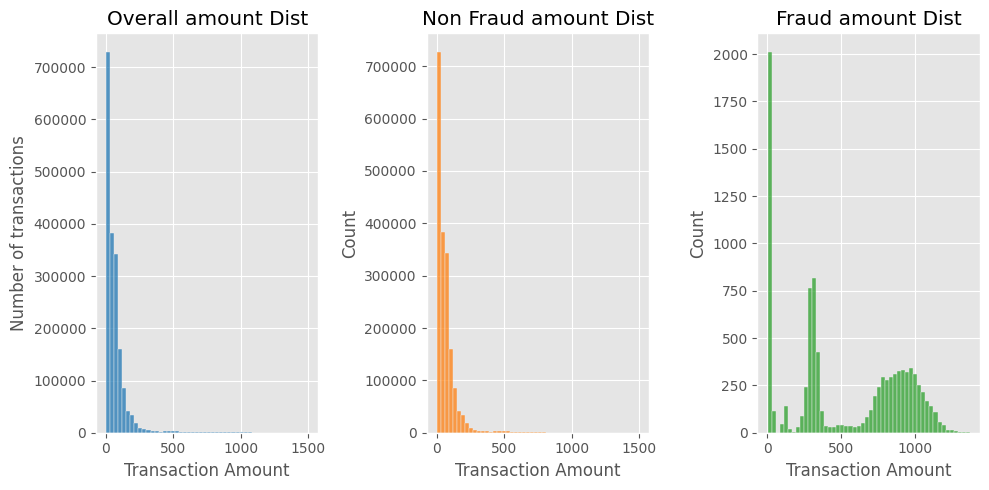

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Set the custom color palette
sns.set_palette(custom_palette)

# Create subplots
fig, plots = plt.subplots(figsize=(10, 5), ncols=3)

# Distribution plots
sns.histplot(dataset[dataset.amt <= 1500].amt, bins=50, ax=plots[0], color=custom_palette[0])
sns.histplot(dataset[(dataset.is_fraud == 0) & (dataset.amt <= 1500)].amt, bins=50, ax=plots[1], color=custom_palette[1])
sns.histplot(dataset[(dataset.is_fraud == 1) & (dataset.amt <= 1500)].amt, bins=50, ax=plots[2], color=custom_palette[2])

# Set titles
plots[0].set_title('Overall amount Dist')
plots[1].set_title('Non Fraud amount Dist')
plots[2].set_title('Fraud amount Dist')

# Set x labels
for ax in plots:
    ax.set_xlabel('Transaction Amount')

# Set y label for the first subplot (you can adjust this based on your preference)
plots[0].set_ylabel('Number of transactions')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

labels=["Male","Female"]

fraud_or_not = dataset["gender"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=dataset['gender'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Male vs Female count")
fig.show()

In [ ]:
dataset.shape


(1852394, 22)

In [ ]:
dataset.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0


In [ ]:
# merged_df.to_csv('/content/drive/MyDrive/DS_Capstone/merged_data.csv', index=False)

In [ ]:
import plotly.express as px

labels=["Genuine","Fraud"]

fraud_or_not = dataset["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=dataset['is_fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

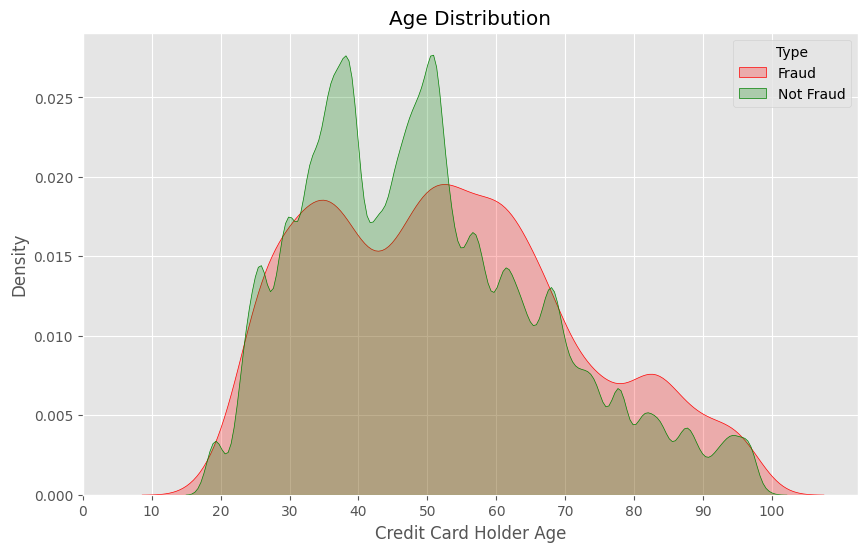

In [ ]:
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# Calculate age
train['age'] = dt.date.today().year - pd.to_datetime(train['dob']).dt.year

# Create a KDE plot with different colors for 'Fraud' and 'Not Fraud'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train[train['is_fraud'] == 1]['age'], color='red', fill=True, label='Fraud')
sns.kdeplot(data=train[train['is_fraud'] == 0]['age'], color='green', fill=True, label='Not Fraud')

# Customize the plot
plt.xlabel('Credit Card Holder Age')
plt.ylabel('Density')
plt.xticks(np.arange(0, 110, 10))
plt.title('Age Distribution')
plt.legend(title='Type')

# Show the plot
plt.show()


In [ ]:
pip install pandas folium


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning:

Horizontal orientation ignored with only `y` specified.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning:

Horizontal orientation ignored with only `y` specified.



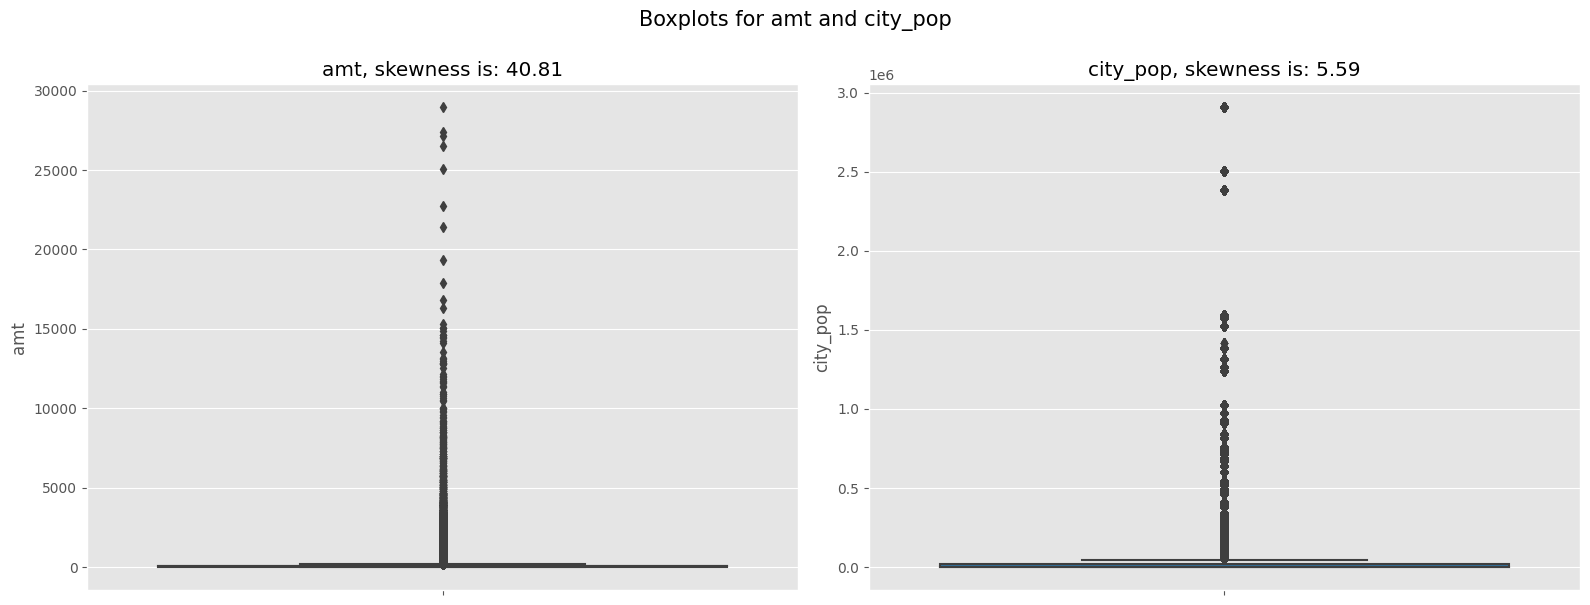

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create boxplots for specified columns
def boxplots_custom(dataset, columns_list, suptitle):
    fig, axs = plt.subplots(1, len(columns_list), figsize=(16, 6))
    fig.suptitle(suptitle, y=1, size=15)

    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset, y=data, orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: ' + str(round(dataset[data].skew(), 2)))

# Select only 'amt' and 'city_pop' columns
selected_columns = ['amt', 'city_pop']

# Call the function to create boxplots for the selected columns
boxplots_custom(dataset=dataset, columns_list=selected_columns, suptitle='Boxplots for amt and city_pop')

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
# import pandas as pd
# import folium

# # Assuming your dataset is loaded into a DataFrame called 'data'
# # Assuming 'lat', 'long', and 'trans_date_trans_time' are columns in your dataset

# # Convert 'trans_date_trans_time' to datetime format
# dataset['trans_date_trans_time'] = pd.to_datetime(dataset['trans_date_trans_time'])

# # Filter data for December transactions
# december_data = dataset[(dataset['trans_date_trans_time'].dt.month == 12)]

# # Create a map centered at a specific location (for example, the world center)
# map_center = [0, 0]  # Latitude, Longitude
# my_map = folium.Map(location=map_center, zoom_start=2)  # You can adjust the zoom level

# # Add markers for December transactions
# for index, row in december_data.iterrows():
#     folium.Marker([row['lat'], row['long']]).add_to(my_map)

# # Display the map
# my_map


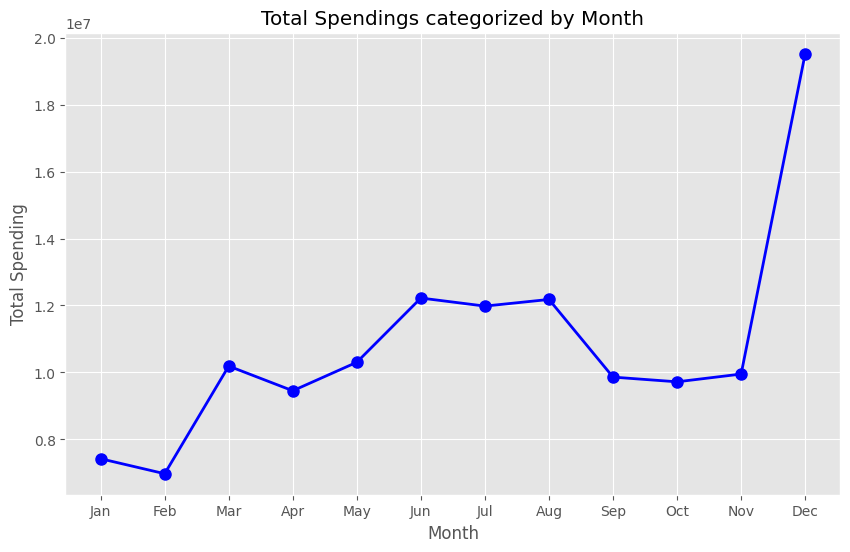

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'trans_date_trans_time' to datetime format
dataset['trans_date_trans_time'] = pd.to_datetime(dataset['trans_date_trans_time'])

# Extract month from the transaction date
dataset['month'] = dataset['trans_date_trans_time'].dt.month

# Group data by month and calculate total spending for each month
monthly_spending = dataset.groupby('month')['amt'].sum()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_spending.index, monthly_spending.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.title('Total Spendings categorized by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


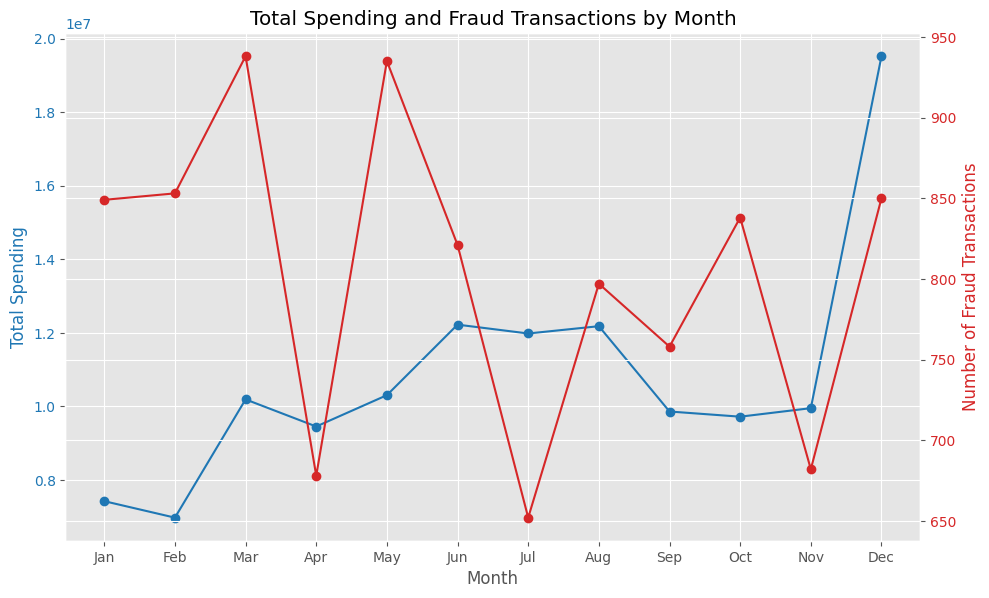

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert 'trans_date_trans_time' to datetime format
dataset['trans_date_trans_time'] = pd.to_datetime(dataset['trans_date_trans_time'])

# Extract month from the transaction date
dataset['month'] = dataset['trans_date_trans_time'].dt.month

# Group data by month and calculate total spending and number of fraud transactions for each month
monthly_data = dataset.groupby('month').agg({'amt': 'sum', 'is_fraud': 'sum'}).reset_index()

# Plotting the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total spending
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Spending', color='tab:blue')
ax1.plot(monthly_data['month'], monthly_data['amt'], marker='o', color='tab:blue', label='Total Spending')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Create a second y-axis to plot fraud transactions
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Fraud Transactions', color='tab:red')
ax2.plot(monthly_data['month'], monthly_data['is_fraud'], marker='o', color='tab:red', label='Fraud Transactions')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legend and title
fig.tight_layout()
plt.title('Total Spending and Fraud Transactions by Month')
plt.show()


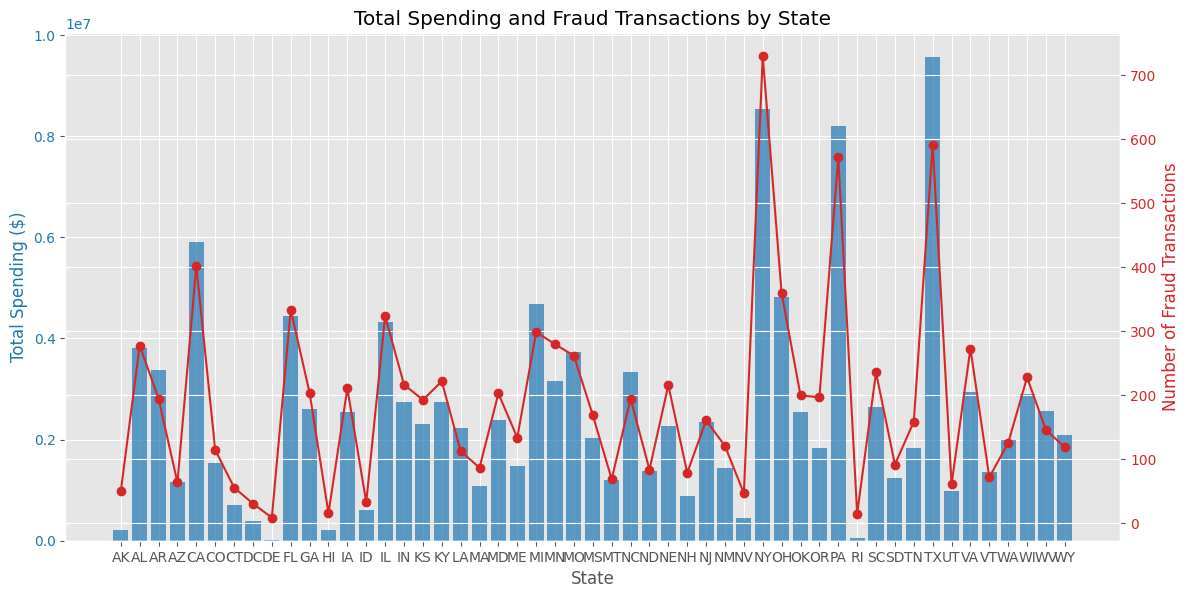

In [ ]:

# Convert 'trans_date_trans_time' to datetime format
dataset['trans_date_trans_time'] = pd.to_datetime(dataset['trans_date_trans_time'])

# Extract month from the transaction date
dataset['month'] = dataset['trans_date_trans_time'].dt.month

# Group data by state and calculate total spending and number of fraud transactions for each state
state_data = dataset.groupby('state').agg({'amt': 'sum', 'is_fraud': 'sum'}).reset_index()

# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total spending
ax1.set_xlabel('State')
ax1.set_ylabel('Total Spending ($)', color='tab:blue')
ax1.bar(state_data['state'], state_data['amt'], color='tab:blue', alpha=0.7, label='Total Spending')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot fraud transactions
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Fraud Transactions', color='tab:red')
ax2.plot(state_data['state'], state_data['is_fraud'], marker='o', color='tab:red', label='Fraud Transactions')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legend and title
fig.tight_layout()
plt.title('Total Spending and Fraud Transactions by State')
plt.xticks(rotation='vertical')
plt.show()



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from imblearn.pipeline import make_pipeline


In [ ]:
smote_pipeline = make_pipeline(SMOTE(random_state=42),
                              RandomForestClassifier(n_estimators=100, random_state=13))


In [ ]:

pd.options.display.float_format = '{:,.2f}'.format
unique_zipcodes = dataset['zip'].nunique()
print(unique_zipcodes)

985


In [ ]:
dataset['trans_date_trans_time'] = pd.to_datetime(dataset['trans_date_trans_time'])
dataset['dob'] = pd.to_datetime(dataset['dob'])

KeyError: ignored

In [ ]:
# Extract relevant information from datetime columns
dataset['trans_year'] = dataset['trans_date_trans_time'].dt.year
dataset['trans_month'] = dataset['trans_date_trans_time'].dt.month
dataset['trans_day'] = dataset['trans_date_trans_time'].dt.day
dataset['dob_year'] = dataset['dob'].dt.year
dataset['dob_month'] = dataset['dob'].dt.month
dataset['dob_day'] = dataset['dob'].dt.day

# Drop the original datetime columns
dataset = dataset.drop(['trans_date_trans_time', 'dob'], axis=1)

KeyError: ignored

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 27 columns):
 #   Column       Dtype  
---  ------       -----  
 0   cc_num       int64  
 1   merchant     object 
 2   category     object 
 3   amt          float64
 4   first        object 
 5   last         object 
 6   gender       object 
 7   street       object 
 8   city         object 
 9   state        object 
 10  zip          int64  
 11  lat          float64
 12  long         float64
 13  city_pop     int64  
 14  job          object 
 15  trans_num    object 
 16  unix_time    int64  
 17  merch_lat    float64
 18  merch_long   float64
 19  is_fraud     int64  
 20  month        int64  
 21  trans_year   int64  
 22  trans_month  int64  
 23  trans_day    int64  
 24  dob_year     int64  
 25  dob_month    int64  
 26  dob_day      int64  
dtypes: float64(5), int64(12), object(10)
memory usage: 381.6+ MB


In [ ]:
dataset.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,month,trans_year,trans_month,trans_day,dob_year,dob_month,dob_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.08,-81.18,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0,1,2019,1,1,1988,3,9
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.89,-118.21,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0,1,2019,1,1,1978,6,21
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.18,-112.26,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0,1,2019,1,1,1962,1,19
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.23,-112.11,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0,1,2019,1,1,1967,1,12
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.42,-79.46,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0,1,2019,1,1,1986,3,28


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 27 columns):
 #   Column       Dtype  
---  ------       -----  
 0   cc_num       int64  
 1   merchant     object 
 2   category     object 
 3   amt          float64
 4   first        object 
 5   last         object 
 6   gender       object 
 7   street       object 
 8   city         object 
 9   state        object 
 10  zip          int64  
 11  lat          float64
 12  long         float64
 13  city_pop     int64  
 14  job          object 
 15  trans_num    object 
 16  unix_time    int64  
 17  merch_lat    float64
 18  merch_long   float64
 19  is_fraud     int64  
 20  month        int64  
 21  trans_year   int64  
 22  trans_month  int64  
 23  trans_day    int64  
 24  dob_year     int64  
 25  dob_month    int64  
 26  dob_day      int64  
dtypes: float64(5), int64(12), object(10)
memory usage: 381.6+ MB


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Separate features (X) and target variable (y)
X = dataset.drop(columns=['is_fraud'])
y = dataset['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Count the class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Count the class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))



Class distribution before SMOTE: Counter({0: 1474217, 1: 7698})


ValueError: ignored